In [1]:
import numpy as np
import matplotlib.pyplot as plt

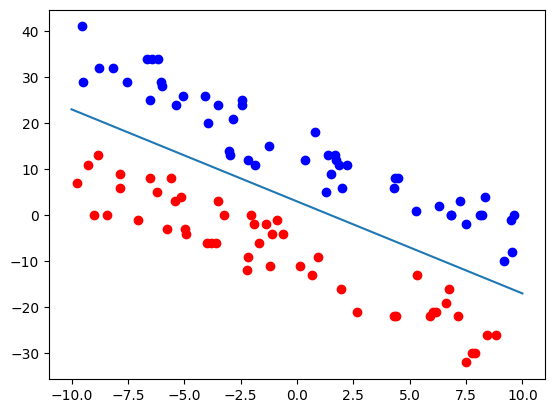

In [33]:
# Generating random data points.

def IdealLine(x):
    return -2*x + 3

NumberOfDataPoints = 100

x = np.linspace(start=-10, stop=10, num=1000)
x1_red   = np.random.rand(NumberOfDataPoints//2)*20 - 10
x1_blue  = np.random.rand(NumberOfDataPoints//2)*20 - 10
x2_red   = np.zeros(NumberOfDataPoints//2)
x2_blue  = np.zeros(NumberOfDataPoints//2)

for i in range(NumberOfDataPoints//2):
    x2_red[i]    = np.random.randint(low = IdealLine(x1_red[i])-20, high=IdealLine(x1_red[i])-5)
    x2_blue[i]   = np.random.randint(low=IdealLine(x1_blue[i])+5, high = IdealLine(x1_blue[i])+20)

plt.scatter(x=x1_red, y=x2_red, color="red")
plt.scatter(x=x1_blue, y=x2_blue, color="blue")
plt.plot(x, IdealLine(x))

In [46]:
# Preparing the Data

data_red  = np.dstack((x1_red, x2_red, np.ones(len(x1_red))))[0]
data_blue = np.dstack((x1_blue, x2_blue, np.ones(len(x1_blue))))[0]

# Perceptron Learning Algorithm
Coeff = np.zeros(3)

def FindMismatched():
    for i in (data_red):
        if(np.inner(i, Coeff) >= 0):
            return (i,-1)
    for j in (data_blue):
        if np.inner(j, Coeff) <= 0:
            return (j,+1) 
    return (None, None)

print(Coeff.shape)
print(data_red[0].shape)

(3,)
(3,)


In [47]:
Separated:bool = True
DataPoint, color = FindMismatched()

count = 0

while DataPoint is not None:
    Coeff += DataPoint*color
    DataPoint, color = FindMismatched()
    count += 1

print(count)
print(Coeff)

10
[ 19.0058845  10.        -10.       ]


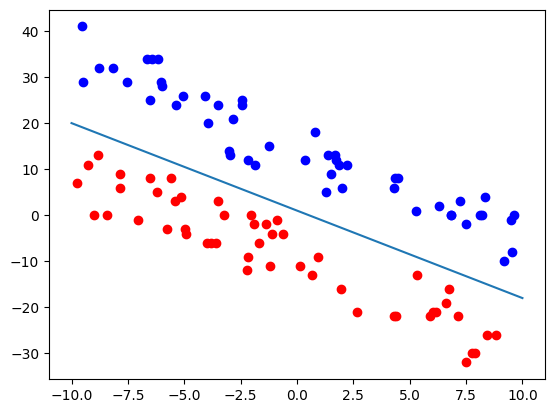

In [49]:
def NewLine(x):
    return - x *(Coeff[0]/Coeff[1]) - (Coeff[2]/Coeff[1])

plt.plot(x, NewLine(x))
plt.scatter(x1_red, x2_red, color="red")
plt.scatter(x1_blue, x2_blue, color="blue")